# Import libraries and dataset

In [327]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Library for boxplots
import seaborn as sns
from plotly.subplots import make_subplots

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Function to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# General explanation of the dataset: Spotify top tracks

It includes information on songs/tracks (100 per year) from Top Hit playlists from 2010 to 2022 created by Spotify.

- *2300 variables* and *23 attribues*

**Ratio variables:**
-  13 track's audio features (danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature)
  
**Nominal variables:**
  - 2 playlist related (playlist_url, year)
  - 3 track related (track_id, track_name, track_popularity)
  - 1 album related (album)
  - 4 artist related (artist_id, artist_name, artist_genre, artist_popularity)

In [328]:
# Load the data:
data = pd.read_csv("playlist_2010to2022.csv")
# print()
data.describe() # Statistical summary of the data

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


# Data understanding

In [329]:
data.describe().transpose() # Statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
year,2300.0,2011.000000,6.634692,2000.000000,2005.00000,2011.0000,2017.000000,2022.000
track_popularity,2300.0,70.943478,12.291526,0.000000,66.00000,72.0000,79.000000,100.000
artist_popularity,2300.0,72.869565,12.179263,29.000000,65.00000,74.0000,82.000000,100.000
danceability,2299.0,0.660116,0.141137,0.162000,0.57200,0.6710,0.759500,0.975
energy,2299.0,0.693047,0.164838,0.051900,0.58600,0.7120,0.820000,0.999
key,2299.0,5.277947,3.628494,0.000000,2.00000,5.0000,8.000000,11.000
loudness,2299.0,-5.784040,2.080853,-21.107000,-6.82350,-5.5110,-4.364500,-0.276
mode,2299.0,0.598521,0.490304,0.000000,0.00000,1.0000,1.000000,1.000
speechiness,2299.0,0.097795,0.092445,0.022500,0.03800,0.0568,0.115500,0.576
acousticness,2299.0,0.157689,0.203844,0.000013,0.01650,0.0689,0.223000,0.978



- **Year:** The year when the track was released
- **Track_popularity :**This attribute represents the popularity of the track on Spotify. Its value  ranges from 0 to 100, with higher values indicating more popular tracks
- **Artist_popularity :**   Similar to track popularity, this attribute represents the popularity of the artist associated with the track
- **Danceability:**  This attribute measures how suitable a track is for dancing on a scale from 0 to 1, with higher values indicating a track that is more danceable.      
- **Energy:**  Energy represents the intensity and activity level of a track and is typically measured on a scale from 0 to 1             
- **key:** This attribute indicates the key of the track, which is a musical attribute referring to the tonal center or the pitch around which the song revolves. It is represented as an integer value from 0 to 11, where each number corresponds to a specific musical key                 
- **Loudness:**  It measures the overall volume of the track in decibels (dB). It represents how loud or quiet the song is. Negative values indicate quieter tracks, and positive values indicate louder tracks.          
- **Mode:** It refers to a set of musical notes and patterns that create a particular mood or feeling in a piece of music. The mode of a song can influence its emotional impact and overall tonal quality.
      Major Mode (1): This indicates that the track is primarily based on a major scale. Major scales are associated with a brighter, happier, and more uplifting mood. Many popular and catchy songs are composed in major keys.
      Minor Mode (0): This indicates that the track is primarily based on a minor scale. Minor scales often convey a sadder, more melancholic, or introspective mood. Many emotional or dramatic songs are composed in minor keys.
               
- **Speechiness:** Speechiness measures the presence of spoken words in the track as opposed to instrumental music. It's a value between 0 and 1, with higher values indicating that the track contains more speech or spoken words        
- **Acousticness: ** Acousticness measures the extent to which a track is acoustic (recorded with acoustic instruments) as opposed to electronic or synthesized. It's a value between 0 and 1, with higher values indicating a more acoustic sound.       
- **Instrumentalness:**  This attribute quantifies the extent to which a track is instrumental, meaning it does not contain vocal content. It ranges from 0 to 1, with higher values indicating a more instrumental track.  
- **Liveness:**  Liveness measures the likelihood that the track was recorded during a live performance. A higher value (closer to 1) suggests that the track is more likely to be live, while a lower value (closer to 0) suggests it was likely recorded in a studio         
- **Valence :**    Valence represents the overall positivity or happiness of a track's mood on a scale from 0 to 1. Higher values indicate a more positive or happy mood         
- **Tempo:** Tempo is the beats per minute (BPM) of the track, indicating how fast or slow the music is.               
- **Duration_ms:**  This attribute represents the duration of the track in milliseconds         
- **Time_signature:** Time signature indicates the number of beats in each measure of music. It's typically represented as an integer, with common values being 3 (for waltz), 4 (for most pop and rock music), or 5 (less common).      

In [330]:
data.drop(['key','mode','year'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,2300.0,70.943478,12.291526,0.000000,66.00000,72.0000,79.000000,100.000
artist_popularity,2300.0,72.869565,12.179263,29.000000,65.00000,74.0000,82.000000,100.000
danceability,2299.0,0.660116,0.141137,0.162000,0.57200,0.6710,0.759500,0.975
energy,2299.0,0.693047,0.164838,0.051900,0.58600,0.7120,0.820000,0.999
loudness,2299.0,-5.784040,2.080853,-21.107000,-6.82350,-5.5110,-4.364500,-0.276
speechiness,2299.0,0.097795,0.092445,0.022500,0.03800,0.0568,0.115500,0.576
acousticness,2299.0,0.157689,0.203844,0.000013,0.01650,0.0689,0.223000,0.978
instrumentalness,2299.0,0.013766,0.083990,0.000000,0.00000,0.0000,0.000054,0.985
liveness,2299.0,0.172618,0.131620,0.021000,0.08995,0.1190,0.220000,0.843
valence,2299.0,0.535110,0.227821,0.037700,0.36050,0.5400,0.722000,0.974


At this stage of exploratory data analysis, the non numerical data has been put aside, to make sure that the data is properly cleaned, summarized and hence presented in a organized manner.
These steps, facilitate the effective understanding of data, and gives a global overview of its content

In [331]:
print("Oldest Record")
print(data.iloc[0])

Oldest Record
playlist_url         https://open.spotify.com/playlist/37i9dQZF1DWU...
year                                                              2000
track_id                                        3AJwUDP919kvQ9QcozQPxg
track_name                                                      Yellow
track_popularity                                                    91
album                                                       Parachutes
artist_id                                       4gzpq5DPGxSnKTe4SA8HAU
artist_name                                                   Coldplay
artist_genres                                ['permanent wave', 'pop']
artist_popularity                                                   86
danceability                                                     0.429
energy                                                           0.661
key                                                               11.0
loudness                                                       

The oldest record in the given dataset is "Yellow" by Coldplay

In [332]:
print("Most Recent Record")
print(data.iloc[-1])

Most Recent Record
playlist_url         https://open.spotify.com/playlist/56r5qRUv3jSx...
year                                                              2022
track_id                                        1r8ZCjfrQxoy2wVaBUbpwg
track_name                                              Thousand Miles
track_popularity                                                    77
album                                                   Thousand Miles
artist_id                                       2tIP7SsRs7vjIcLrU85W8J
artist_name                                              The Kid LAROI
artist_genres                                   ['australian hip hop']
artist_popularity                                                   78
danceability                                                     0.376
energy                                                           0.657
key                                                                7.0
loudness                                                  

The most Recent record listed in the dataset is " Thousand Miles " by The Kid LAROI

# Feature analysis

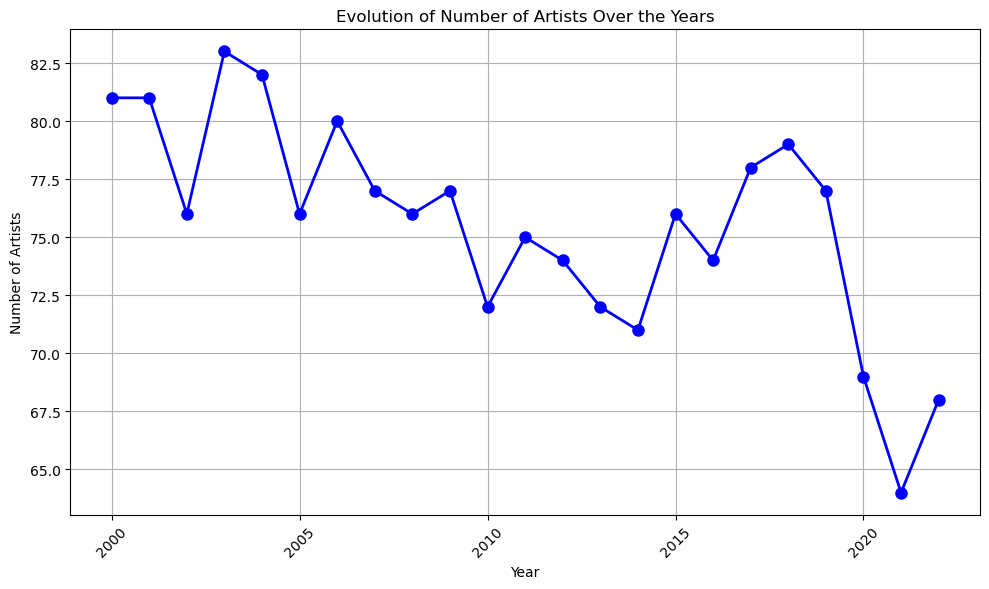

In [333]:
# Group the dataset by 'year' and count the number of unique artists in each year
artists_per_year = data.groupby('year')['artist_name'].nunique()

# Plot the evolution of the number of artists over the years
plt.figure(figsize=(10, 6))
plt.plot(artists_per_year.index, artists_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Number of Artists')
plt.title('Evolution of Number of Artists Over the Years')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the figure above, one can notice that the number of artists , to get into the top 100 of the spotify list has concidearbly decreased over the years, especially starting form the year 2020.

This can suggest, that the access of this list is starting to be monopolized by some artists

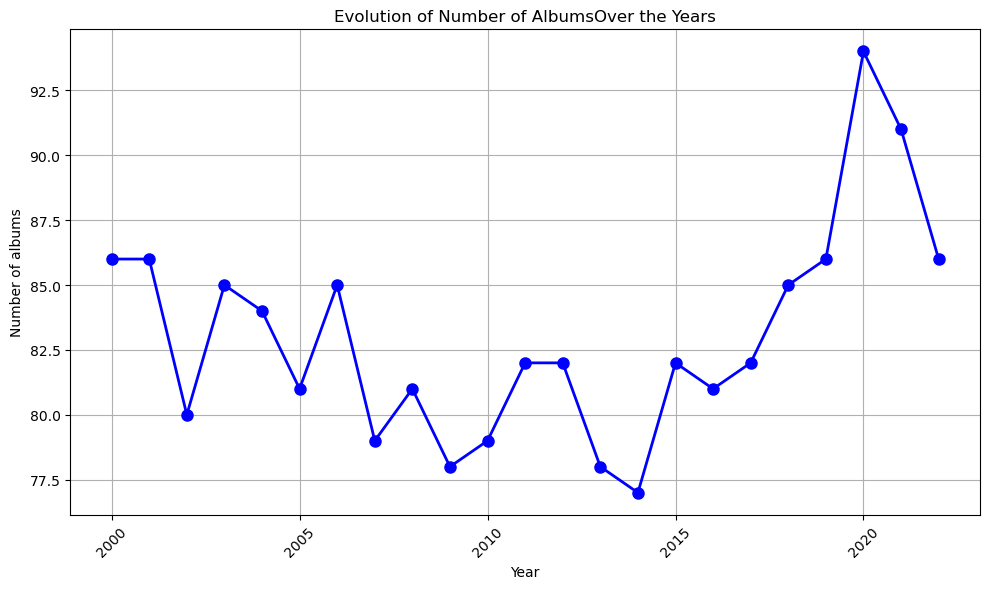

In [334]:
# Group the dataset by 'year' and count the number of unique artists in each year
artists_per_year = data.groupby('year')['album'].nunique()

# Plot the evolution of the number of artists over the years
plt.figure(figsize=(10, 6))
plt.plot(artists_per_year.index, artists_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Number of albums')
plt.title('Evolution of Number of AlbumsOver the Years')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Opposite to the number of artists accessing the  top 100 in spotify, the number of albums, has increased, this can be explaiened by the fact, that the most popular artists, can release multiple albums in a shorter timeframe

### Track duration distribution over the years

In [335]:
data["duration_ms"].mean() / (1000 * 60)
print("the mean track duration is:",data["duration_ms"].mean() / (1000 * 60),"minutes")

the mean track duration is: 3.7672249021313613 minutes


In [336]:
# Convert 'year' column to datetime format if it's not already in datetime format
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Convert duration from milliseconds to minutes
data['duration_minutes'] = data['duration_ms'] / (1000 * 60)  # Convert milliseconds to minutes

# Calculate mean duration over the years in minutes
mean_duration_per_year = data.groupby(data['year'].dt.year)['duration_minutes'].mean().reset_index()

# Plot th\e average track duration over the years in minutes
fig = px.bar(mean_duration_per_year, x='year', y='duration_minutes',
             labels={"year": "Release Year", "duration_minutes": "Mean Track Duration (minutes)"})
fig.update_layout(height=500, width=700, title_text="Mean Track Duration Over Years")

fig.show()

Since the year 2000, the track duration has been hovering arround the mean value, it sometimes goes beyond and reaches 4 minutes, but it sometimes less.
The interresting part to get form this graph, is that, the durations has dropped since since the year 2019, and has been stable arround 3,28 minutes.

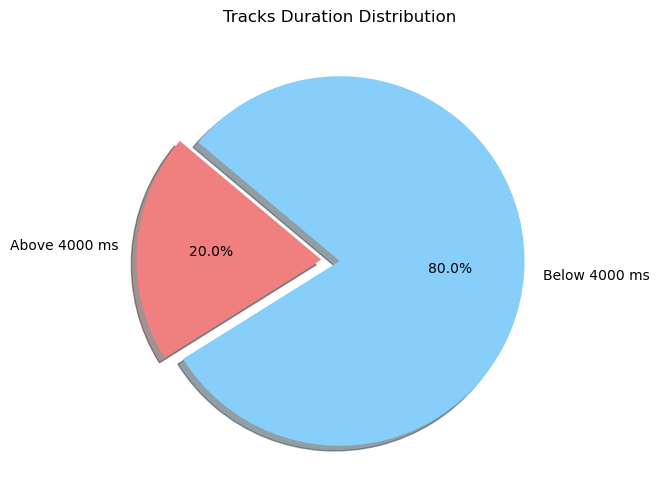

In [337]:
import matplotlib.pyplot as plt

# Sample data, replace this with your actual data
track_durations = [4000, 3500, 3800, 3200, 3900, 3700, 4100, 3600, 4200, 3100]

# Count tracks with duration over 4000 and below
above_threshold = sum(duration > 4000 for duration in track_durations)
below_threshold = len(track_durations) - above_threshold

# Data to plot
labels = 'Above 4000 ms', 'Below 4000 ms'
sizes = [above_threshold, below_threshold]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Tracks Duration Distribution')
plt.show()


It has been noticed before, that the duration can exceed 4 minutes, the graph above, shows that only 20% of the tracks released, and classified as the top 100 in spotify, have a duration that goes beyond 4 minutes.

This can indicate, that duration, if above 4 minutes, can disqualify a track to reach the 100 top tracks on spotify.

### Keys and mode

In [338]:
import plotly.graph_objects as pgo
from plotly.subplots import make_subplots

# Assuming 'data' is your original DataFrame with the 'key' and 'mode' columns
key_mapping = {0: "C", 1: "C♯", 2: "D", 3: "D♯", 4: "E", 5: "F", 6: "F♯", 7: "G", 8: "G♯", 9: "A", 10: "A♯", 11: "B"}
key_counts_df = pd.DataFrame(data["key"].value_counts().reset_index())
key_counts_df['key_names'] = key_counts_df.index.to_series().map(key_mapping)

key_labels = key_counts_df['key_names'].values
key_values = key_counts_df['key'].values

mode_mapping = {0: "Minor", 1: "Major"}
mode_counts_df = pd.DataFrame(data["mode"].value_counts().reset_index())
mode_counts_df['mode_names'] = mode_counts_df.index.to_series().map(mode_mapping)

mode_labels = mode_counts_df['mode_names'].values
mode_values = mode_counts_df['count'].values

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    pgo.Pie(labels=key_labels, values=key_values), row=1, col=1)

fig.add_trace(
    pgo.Pie(labels=mode_labels, values=mode_values), row=1, col=2)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(height=600, width=1200, title_text="Keys and Modes")
fig.show()

From this graph, we can notice, that keys are almost equaly distributed, with a slightly higher preference for the C and C# keys.
Same for the mode, the Major mode, leads the minor mode by 19%.

###Artist based analysis

In [339]:
years = data.year.unique()
top_artists_each_year = [data.query('year == @year').sort_values("track_popularity", ascending=False).iloc[0] for year in years]
top_artists_each_year_df = pd.DataFrame(top_artists_each_year)
top_artists_each_year_df['artists'] = top_artists_each_year_df['artist_name'].apply(lambda x: x.replace("[","").replace("]","").replace("'",""))
top_artists_each_year_df['artist_genres'] = [data[data.artist_name.str.contains(artist.split(",")[0])]["artist_genres"].iloc[0].replace("[","").replace("]","") for artist in top_artists_each_year_df["artists"].values]


In [340]:
fig = px.scatter(top_artists_each_year_df, x="year", y="track_popularity", hover_data=['artist_name', 'track_name'])
fig.update_traces(mode='markers', marker_line_width=2, marker=dict(size=10, color='rgba(30, 215, 96, .9)'))
fig.update_layout(title="Most Popular Artists and Songs Each Year")
fig.show()

The above figure, shows the most popular artist of the year, since the year 2000.
One interesting point, is that, the track_popularity has a tendency to increase. But one other intresting point, is the fact, that taylor Swift, has reached the record of popularity in the year 2019, with her track " Cruel Summer", as she is the only one that has reached a 100 popularity score in the 22 years.

In [341]:
# Calculate the number of tracks per artist for each year
artist_counts_per_year = data.groupby(['year', 'artist_name']).size().reset_index(name='count')

# Find the artist with the maximum number of tracks each year
most_productive_artists = artist_counts_per_year.loc[artist_counts_per_year.groupby('year')['count'].idxmax()]

# Create the plot
fig = px.bar(most_productive_artists, x='year', y='count', color='artist_name',
             labels={"artist_name": "Artist", "count": "Number of Tracks"},
             title="Most Productive Artist Over the Years")

fig.update_layout(height=600, width=1100)
fig.show()

When we look at the most productive artist, we notice, a high variety as well, however, the most interesting point, is that the most productive artist, in the year 2000 are NSYNC, however, the most popular one, is Coldplay.

In [342]:
import plotly.graph_objects as go

# Step 1: Calculate the most productive artist for each year based on the number of tracks
most_productive_artists = data.groupby(['year', 'artist_name']).size().reset_index(name='count')
most_productive_artists = most_productive_artists.loc[most_productive_artists.groupby('year')['count'].idxmax()]

# Step 2: Find the most popular track (or artist) for each year
most_popular_tracks = data.loc[data.groupby('year')['track_popularity'].idxmax()]

# Iterate through each year and create individual figures
figures = []
for year in most_productive_artists['year'].unique():
    # Filter data for the specific year
    productive_artist_year = most_productive_artists[most_productive_artists['year'] == year]
    popular_artist_year = most_popular_tracks[most_popular_tracks['year'] == year]

    # Create figure for the current year
    fig = go.Figure()

    # Add bar for most productive artist
    fig.add_trace(go.Bar(x=productive_artist_year['artist_name'], y=productive_artist_year['count'],
                         name='Most Productive Artist', legendgroup='group1'))

    # Add bar for most popular artist
    fig.add_trace(go.Bar(x=popular_artist_year['artist_name'], y=popular_artist_year['track_popularity'],
                         name='Most Popular Artist', legendgroup='group2'))

    # Update layout
    fig.update_layout(title=f"Most Productive vs Most Popular Artist in {year}",
                      barmode='group', legend_traceorder='reversed')

    # Add current figure to the list of figures
    figures.append(fig)

# Show the figures (you can also save them or do further processing)
for fig in figures:
    fig.show()

In [343]:
# Step 1: Filter data for the years 2000, 2015, and 2022
years = [2000, 2015, 2022]
fig = make_subplots(rows=1, cols=3, subplot_titles=['2000', '2015', '2022'], shared_yaxes=True)
data['year'] = pd.to_datetime(data['year']).dt.year

for i, year in enumerate(years):
    filtered_data = data[data['year'] == year]
    artist_popularity = filtered_data.groupby('artist_name')['track_popularity'].sum().reset_index()
    sorted_artists = artist_popularity.sort_values(by='track_popularity', ascending=False).head(10)

    fig.add_trace(
        go.Bar(
            y=sorted_artists['artist_name'],
            x=sorted_artists['track_popularity'],
            orientation='h',
            name=str(year)
        ),
        row=1, col=i + 1
    )

fig.update_layout(height=600, width=1100, showlegend=True, title_text="Top 10 Artists by Total Track Popularity")
fig.update_xaxes(title_text="Total Track Popularity")
fig.update_yaxes(title_text="Artist")
fig.show()



The figure above, is quiet informative, as it gives some usefull information.


1.   The list of the most popular artist has drastically changed over the years. This  makes sence, concidering the fact, that the given data, is a 22 years data, and the music industry is a quiet fast paced industry, in which the trends vary quiet fast
2.  The weekend and Taylor swift, have managed to maintain their popularity, and to maintain thier songs amongst the most heard songs in spotify.



As seen previously, the Energy of a song has an influence on its popularity. It has also been observed, that this influence, wansn't that seginificant.
This hypothesis, can  be further proved by the graph above, it clearly demonstrate that the increase of energy, has a negative influence in the popularity overall, however it's important to notice, that the popularity of the track, almost never goes below 55.

### Genre based Analysis

As a result, we've found 437 genres. It's not ideal to plot all the genres by year as there are a lot to understand with a graphic.

In [344]:
#Transformation of the artist genre feature to explode it (separe each genre element)
from ast import literal_eval

genre_list = data["artist_genres"].apply(literal_eval) #convert to list type
genre_counts = data
genre_counts['genres'] = genre_list
genre_counts = genre_counts.explode('genres')

#Count each genre by year
genre_counts = genre_counts.groupby(['year', 'genres']).size().reset_index(name='count')

## Get a dataframe with the genres by year, one row by year
# Pivot the DataFrame to have 'year' as the index and 'genre' as columns
pivot_df = genre_counts.pivot(index='year', columns='genres', values='count').fillna(0)
pivot_df['year'] = pivot_df.index
pivot_df = pivot_df.reset_index(drop=True)

"""
#### PLOTING ALL GENRES COUNT BY YEAR ####
# Create the stacked area plot
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='area', stacked=True, colormap='Paired')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Plot of Genre Counts Over Years')

# Show the plot by total
plt.grid(True)
plt.show()


#### PLOTING ALL GENRES % BY YEAR ####
test = pivot_df.groupby(pivot_df['year']).sum()
test = test.div(test.sum(axis=1), axis=0).mul(100)
test.plot(kind='bar', stacked=True, figsize=(15,9), title='Stacked bar')

for i, v in test.reset_index(drop=True).iterrows():
    for val in v:
        plt.text(i, val/2, str(round(val))+'%', size=12)

plt.show()
"""

"\n#### PLOTING ALL GENRES COUNT BY YEAR ####\n# Create the stacked area plot\nplt.figure(figsize=(10, 6))\npivot_df.plot(kind='area', stacked=True, colormap='Paired')\n\n# Customize the plot\nplt.xlabel('Year')\nplt.ylabel('Cumulative Count')\nplt.title('Cumulative Plot of Genre Counts Over Years')\n\n# Show the plot by total\nplt.grid(True)\nplt.show()\n\n\n#### PLOTING ALL GENRES % BY YEAR ####\ntest = pivot_df.groupby(pivot_df['year']).sum()\ntest = test.div(test.sum(axis=1), axis=0).mul(100)\ntest.plot(kind='bar', stacked=True, figsize=(15,9), title='Stacked bar')\n\nfor i, v in test.reset_index(drop=True).iterrows():\n    for val in v:\n        plt.text(i, val/2, str(round(val))+'%', size=12)\n\nplt.show()\n"

#### Know the top 10 most common genres
Reduce the genres from 437 to 166 by choising the 10 more relevant. A new classification is done by just choosing these 10 and all the others (157 genres) in a 11th type called "Other".

Note that each song has several artist genre elements (ex.'dance pop', 'girl group', 'pop', 'r&b', 'urban contemporary'), so, the quantity of the genres is not representative of the quantity of the songs.

In [345]:
from collections import Counter

# Concatenate all column names into a single string
all_column_names = ' '.join(pivot_df.columns)

# Separate all the strings in words
words = all_column_names.split()

# Find the words with the highest count
principal_genres = 10
most_common_word= Counter(words).most_common(principal_genres) #save the word and its counter of
result = [x[0] for x in most_common_word] #save just the name of the top ten genres

# Modify manually the hip and hop to obtain hip hop
result.remove('hop')
result.remove('hip')
result.append('hip hop')
pivot_reduced =pivot_df #Copy of the original count to reduce the genres quantity

#Cycle to create the new resume genres (top 10 most common words)
for x in result:
  columns = [col for col in pivot_df.columns if x in col]
  pivot_reduced = pivot_reduced[[col for col in pivot_reduced.columns if x not in col]]
  pivot_reduced[x] = pivot_df[columns].sum(axis=1)


#Quit the most common word genres to summarize just the "other" genres
pivot_reduced2 = pivot_reduced
for x in result:
  pivot_reduced2 = pivot_reduced2.drop(columns=x)

pivot_reduced2['other'] = pivot_reduced2.sum(axis=1)
new = pivot_reduced2['other'].to_frame()

for x in result:
  new[x] = pivot_reduced[x]
new['year'] =pivot_df['year']

C:\Users\Antony\AppData\Local\Temp\ipykernel_19708\2859933794.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Plot 10 more relevant and others:
This shows that other is a large quantity but, as it was said before, its quantity is no representative as each song has several genres elements. For that, we plot also the just the top genres.

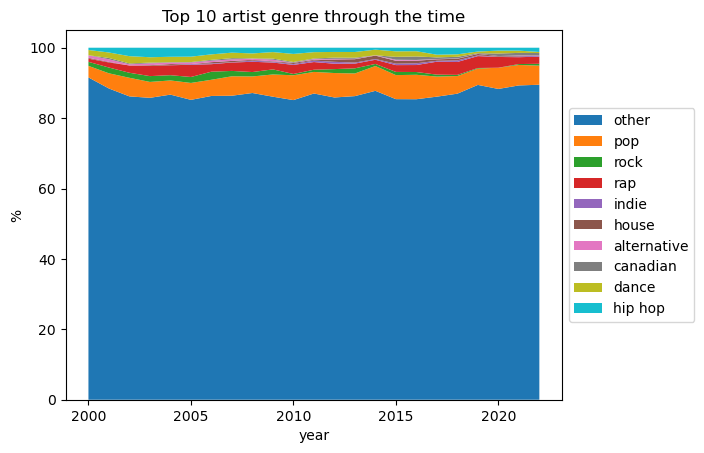

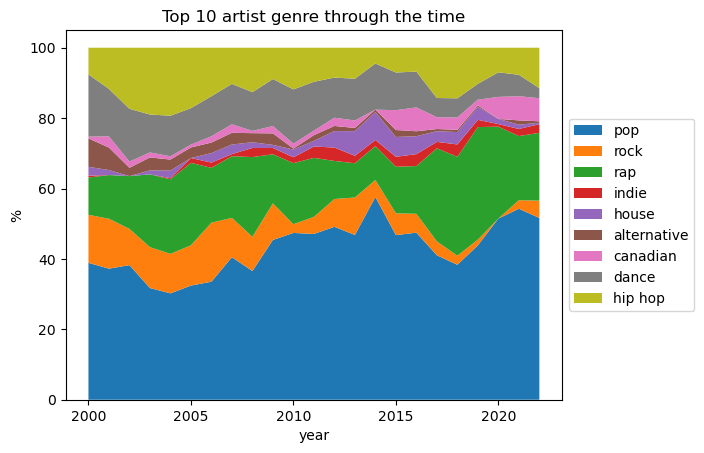

In [346]:
### First plot with the top and other genres ###
test1_complete = new.drop(columns=['year'])
test1 = test1_complete.groupby(new['year']).sum()
test1 = test1.div(test1.sum(axis=1), axis=0).mul(100)

plt.figure()
plt.title('Top 10 artist genre through the time')
plt.xlabel('year')
plt.ylabel('%')

plt.stackplot(new['year'],test1['other'],test1[result[0]],test1[result[1]],test1[result[2]],test1[result[3]],
              test1[result[4]],test1[result[5]],test1[result[6]],test1[result[7]],test1[result[8]],labels=test1.columns)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Second plot with the top genres ###
plt.figure()
test = new.drop(columns=['year','other'])
test = test.groupby(new['year']).sum()
test = test.div(test.sum(axis=1), axis=0).mul(100)

plt.title('Top 10 artist genre through the time')
plt.xlabel('year')
plt.ylabel('%')

plt.stackplot(new['year'],test[result[0]],test[result[1]],test[result[2]],test[result[3]],
              test[result[4]],test[result[5]],test[result[6]],test[result[7]],test[result[8]],labels=test.columns)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Count genres by artist

Create a "data_genres_reduced" df with counters for the top ten genres (and also, a counter if each song hasn't any of the top ten genres in the artist_genres column

In [347]:
'''Exclusive Classification
'''
data_genres_reduced = data
for element in result:
    data_genres_reduced[element] = data_genres_reduced['artist_genres'].apply(lambda x: 1 if any(word in eval(x) for word in element.split()) else 0)

# Create the "other_genre" column
data_genres_reduced['other_genre'] = data_genres_reduced[result].apply(lambda row: 1 if row.sum() == 0 else 0, axis=1)
# Remplacer les data suivantes !
data = data_genres_reduced

'''Non-exclusive classification
'''
pop_keywords = ['pop', 'europop', 'dance pop', 'latin pop', 'mexican pop', 'puerto rican pop', 'belgian pop', 'uk pop', 'uk contemporary r&b', 'nz pop', 'icelandic pop', 'canadian pop']
rock_keywords = ['rock', 'modern rock', 'punk', 'pop punk', 'hard rock', 'grunge', 'indie rock', 'garage rock', 'alternative rock', 'britpop', 'classic rock']
hip_hop_keywords = ['hip hop', 'rap', 'trap', 'rap metal', 'southern hip hop', 'east coast hip hop', 'west coast rap', 'chicago rap', 'dirty south rap', 'gangster rap', 'trap queen', 'crunk', 'trap latino', 'latin hip hop', 'reggaeton', 'chicano rap', 'texas latin rap', 'miami hip hop', 'rap kreyol', 'hyphy', 'oakland hip hop', 'country rap']
electronic_keywords = ['electronica', 'trip hop', 'house', 'trance', 'big beat', 'downtempo', 'techno', 'electro', 'electro house', 'progressive house', 'moombahton', 'tropical house', 'deep house', 'hardcore techno']
pop_rnb_keywords = ['contemporary r&b', 'r&b', 'urban contemporary', 'neo soul', 'vocal jazz', 'soul', 'reggae fusion', 'indietronica', 'singer-songwriter pop']

import ast

# Fonctions permettant de vérifier si un mot-clé appartient à une catégorie spécifique
def check_keyword_category(keywords_list, category_keywords):
  for keyword in ast.literal_eval(keywords_list):
      if keyword in category_keywords:
          return 1
  return 0

def is_other(row):
  if row['is_pop'] == 0 and row['is_rock'] == 0 and row['is_hip_hop'] == 0 and row['is_electronic'] == 0 and row['is_pop_rnb'] == 0:
      return 1
  return 0

new_data = pd.concat([data.iloc[:, 4] ,data.iloc[:, 8] ,data.iloc[:, 9:23]], axis=1).dropna(axis=0)

# Ajoute des résultats triés à une nouvelle colonne
data['is_pop'] = new_data['artist_genres'].apply(lambda x: check_keyword_category(x, pop_keywords))
data['is_rock'] = new_data['artist_genres'].apply(lambda x: check_keyword_category(x, rock_keywords))
data['is_hip_hop'] = new_data['artist_genres'].apply(lambda x: check_keyword_category(x, hip_hop_keywords))
data['is_electronic'] = new_data['artist_genres'].apply(lambda x: check_keyword_category(x, electronic_keywords))
data['is_pop_rnb'] = new_data['artist_genres'].apply(lambda x: check_keyword_category(x, pop_rnb_keywords))
data['Others'] = data.apply(is_other, axis=1)


In [348]:
data

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,canadian,dance,hip hop,other_genre,is_pop,is_rock,is_hip_hop,is_electronic,is_pop_rnb,Others
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0


# Delete null rows

In [349]:
# Look for null values in the dataset
colonnes_avec_nulls = data.columns[data.isnull().any()]

# Display the number of null values in each colomn
print(data[colonnes_avec_nulls].isnull().sum())

danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
duration_minutes    1
is_pop              1
is_rock             1
is_hip_hop          1
is_electronic       1
is_pop_rnb          1
dtype: int64


In [350]:
# Delete the rows containing null values
data = data.dropna(axis=0)

# Check that the dataset doesn't contain anymore null values
print(data[colonnes_avec_nulls].isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
duration_minutes    0
is_pop              0
is_rock             0
is_hip_hop          0
is_electronic       0
is_pop_rnb          0
dtype: int64


In [351]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2299.0,2011.003045,6.634528,2000.000000,2005.000000,2011.000000,2017.000000,2022.000000
track_popularity,2299.0,70.944759,12.294047,0.000000,66.000000,72.000000,79.000000,100.000000
artist_popularity,2299.0,72.873423,12.180506,29.000000,65.000000,74.000000,82.000000,100.000000
danceability,2299.0,0.660116,0.141137,0.162000,0.572000,0.671000,0.759500,0.975000
energy,2299.0,0.693047,0.164838,0.051900,0.586000,0.712000,0.820000,0.999000
key,2299.0,5.277947,3.628494,0.000000,2.000000,5.000000,8.000000,11.000000
loudness,2299.0,-5.784040,2.080853,-21.107000,-6.823500,-5.511000,-4.364500,-0.276000
mode,2299.0,0.598521,0.490304,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,2299.0,0.097795,0.092445,0.022500,0.038000,0.056800,0.115500,0.576000
acousticness,2299.0,0.157689,0.203844,0.000013,0.016500,0.068900,0.223000,0.978000


The .describe() function does a descriptive analysis of the full dataset. In the previous step, we deleted only one row containing the null value. That said, the dataset containes 2300 variables/rows. It hence make sence

### Delete non-important columns

In [352]:
data.dtypes

playlist_url          object
year                   int32
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
duration_minutes     float64
genres                object
pop                    int64
rock                   int64
rap                    int64
indie                  int64
house                  int64
alternative            int64
canadian               int64
dance                  int64
hip hop                int64
other_genre   

In [353]:
columns_to_delete = ['playlist_url', 'year', 'track_id', 'track_name', 'album', 'artist_id', 'artist_name', 'artist_genres', 'genres', 'instrumentalness','time_signature']

data_dropped = data.drop(columns_to_delete, axis=1)
print(data_dropped.head())

   track_popularity  artist_popularity  danceability  energy   key  loudness  \
0                91                 86         0.429   0.661  11.0    -7.227   
1                84                 75         0.434   0.897   0.0    -4.918   
2                69                 61         0.529   0.496   7.0    -9.007   
3                88                 83         0.556   0.864   3.0    -5.870   
4                74                 65         0.610   0.926   8.0    -4.843   

   mode  speechiness  acousticness  liveness  ...  canadian  dance  hip hop  \
0   1.0       0.0281       0.00239    0.2340  ...         0      0        0   
1   1.0       0.0488       0.01030    0.6120  ...         0      0        0   
2   1.0       0.0290       0.17300    0.2510  ...         0      0        0   
3   0.0       0.0584       0.00958    0.2090  ...         0      0        0   
4   0.0       0.0479       0.03100    0.0821  ...         0      0        0   

   other_genre  is_pop  is_rock  is_hip_hop 

In [354]:
from sklearn.preprocessing import StandardScaler

# Sélectionne uniquement les colonnes numériques que vous souhaitez normaliser
numeric_columns = ['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','time_signature']

# Crée un objet StandardScaler
scaler = StandardScaler()

# Applique la normalisation aux colonnes sélectionnées
std_scale = StandardScaler().fit(data_dropped)
data_scaled = std_scale.transform(data_dropped)

By analysing the distribution of the ratio variables, there are considerable outliers data. It's necessary to drop them to get a more accuracy matrix correlation analysis

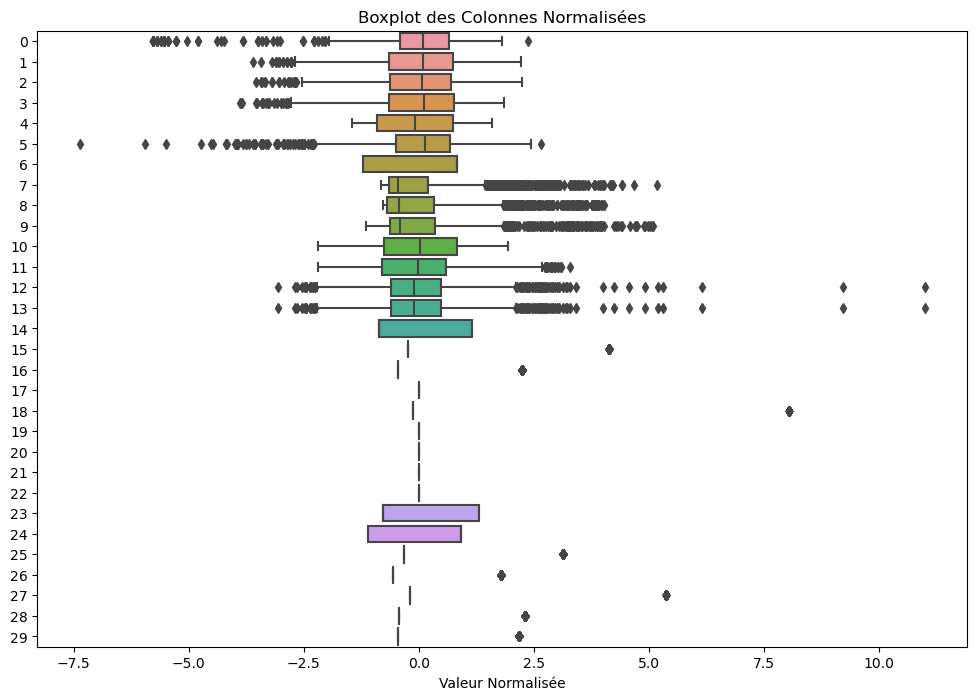

In [355]:
# Create a subset of data using the columns
sous_ensemble_donnees = data_scaled

# Create boxplot for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=sous_ensemble_donnees, orient='h')
plt.xlabel('Valeur Normalisée')
plt.title('Boxplot des Colonnes Normalisées')

plt.show()

# PCA Test to Explore

In [356]:
data

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,canadian,dance,hip hop,other_genre,is_pop,is_rock,is_hip_hop,is_electronic,is_pop_rnb,Others
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0


In [357]:
#PCA TEST
from sklearn.decomposition import PCA

# Vérifier les formes
print (data_dropped.shape, data_scaled.shape)

(2299, 30) (2299, 30)


In [358]:
# Moyenne et variance par colonne (axe=0) avant mise à l'échelle
print(np.mean(data_dropped, axis=0), np.var(data_dropped, axis=0))

track_popularity         70.944759
artist_popularity        72.873423
danceability              0.660116
energy                    0.693047
key                       5.277947
loudness                 -5.784040
mode                      0.598521
speechiness               0.097795
acousticness              0.157689
liveness                  0.172618
valence                   0.535110
tempo                   120.512450
duration_ms          226033.494128
duration_minutes          3.767225
pop                       0.431927
rock                      0.055241
rap                       0.166594
indie                     0.000000
house                     0.015224
alternative               0.000000
canadian                  0.000000
dance                     0.000000
hip hop                   0.000000
other_genre               0.371466
is_pop                    0.546759
is_rock                   0.092214
is_hip_hop                0.238799
is_electronic             0.033493
is_pop_rnb          

In [359]:
# Moyenne et variance par colonne (axe=0) après mise à l'échelle
print(np.mean(data_scaled, axis=0), np.var(data_scaled, axis=0))

[-7.41758402e-17  5.19230881e-16  2.10164881e-16  9.89011202e-17
  1.54533000e-17  6.18132002e-18  3.94059151e-17 -1.01991780e-16
  3.70879201e-17  8.34478202e-17 -1.23626400e-16 -3.67788541e-16
  9.89011202e-17 -3.95604481e-16  7.41758402e-17  4.32692401e-17
 -1.54533000e-17  0.00000000e+00  3.09066001e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.23626400e-16
 -3.70879201e-17  4.94505601e-17  3.16792651e-17 -4.94505601e-17
  0.00000000e+00 -2.47252801e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1.]


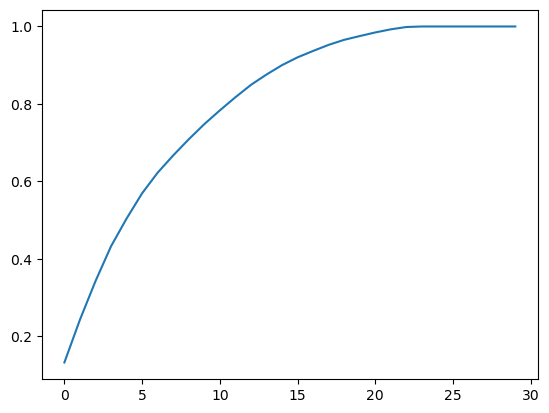

In [360]:
# Ajustez le modèle PCA à vos données
pca= PCA().fit(data_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

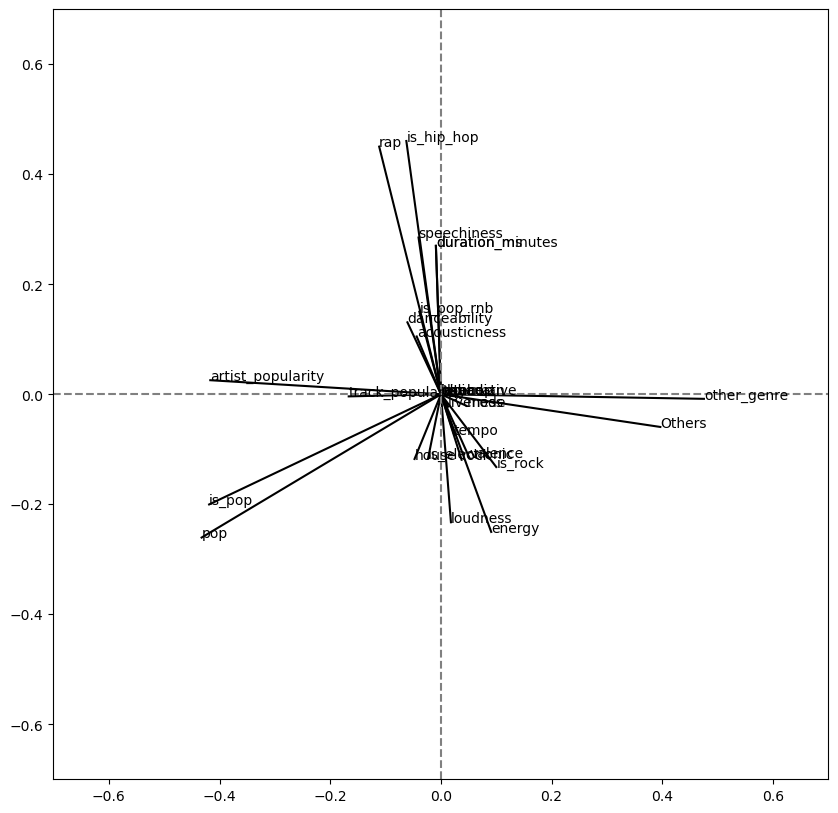

In [361]:
# récupérer les composants
components = pca.components_


# dessiner le schéma de cercle des corrélations
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_dropped.columns[i])
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);
plt.show()

(836, 30)
[ 4.24965751e-16  5.77953421e-16  6.56572085e-16  3.39972601e-16
  1.44488355e-16 -2.54979451e-16  3.71845032e-18 -1.86984930e-16
  8.49931502e-18 -3.82469176e-17 -6.79945202e-17  2.84727053e-16
  1.01991780e-16 -1.35989040e-16 -1.35989040e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0.]


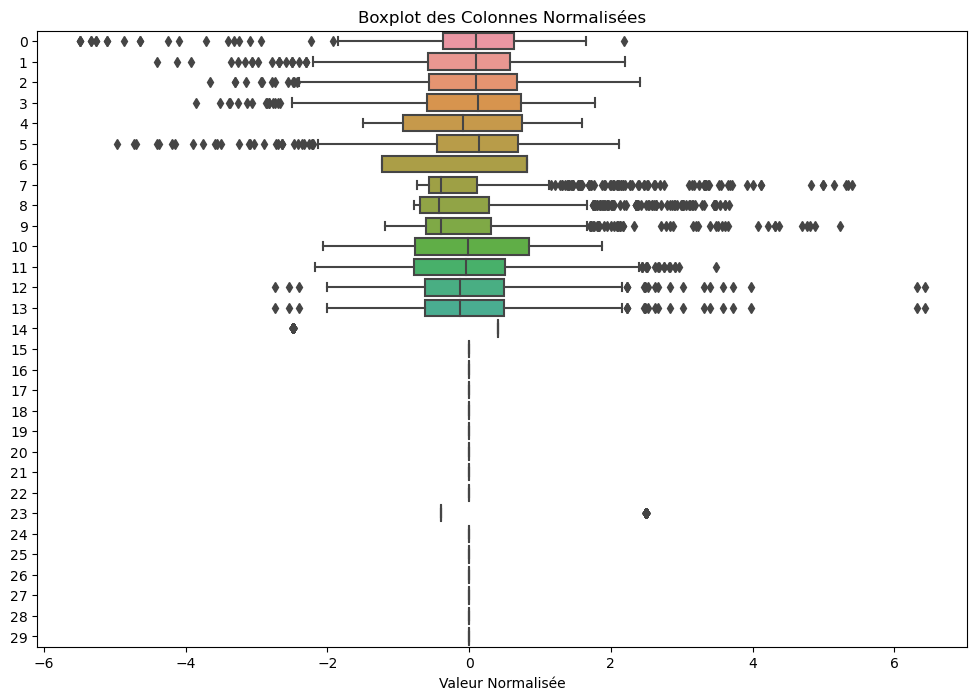

(836, 30)


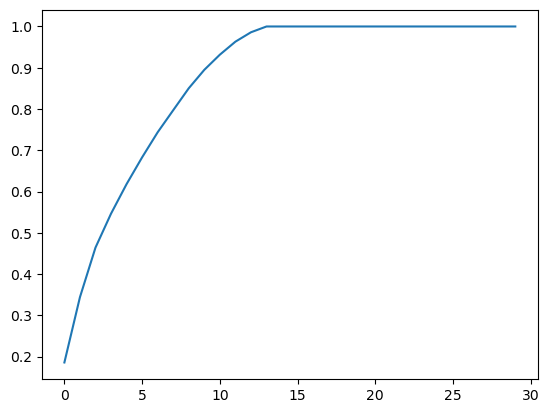

In [362]:


# Améliorer la performance par supprimer les données aberrants

df = pd.DataFrame(data_dropped)

for column in df.columns:
  # Calcule les quantiles
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Définis les limites inférieures et supérieures des valeurs aberrantes
  lower_bound = Q1 - 5 * IQR
  upper_bound = Q3 + 5 * IQR

  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
df_no_outliers = df.dropna(axis=0)
print(df_no_outliers.shape)

# Applique la normalisation aux colonnes sélectionnées
std_scale = StandardScaler().fit(df_no_outliers)
data_scaled = std_scale.transform(df_no_outliers)

print(np.mean(data_scaled, axis=0), np.var(data_scaled, axis=0))

# Créez un boxplot pour chaque colonne
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_scaled, orient='h')
plt.xlabel('Valeur Normalisée')
plt.title('Boxplot des Colonnes Normalisées')

plt.show()


pca_new= PCA().fit(data_scaled)
print(data_scaled.shape)
plt.plot(np.cumsum(pca_new.explained_variance_ratio_))

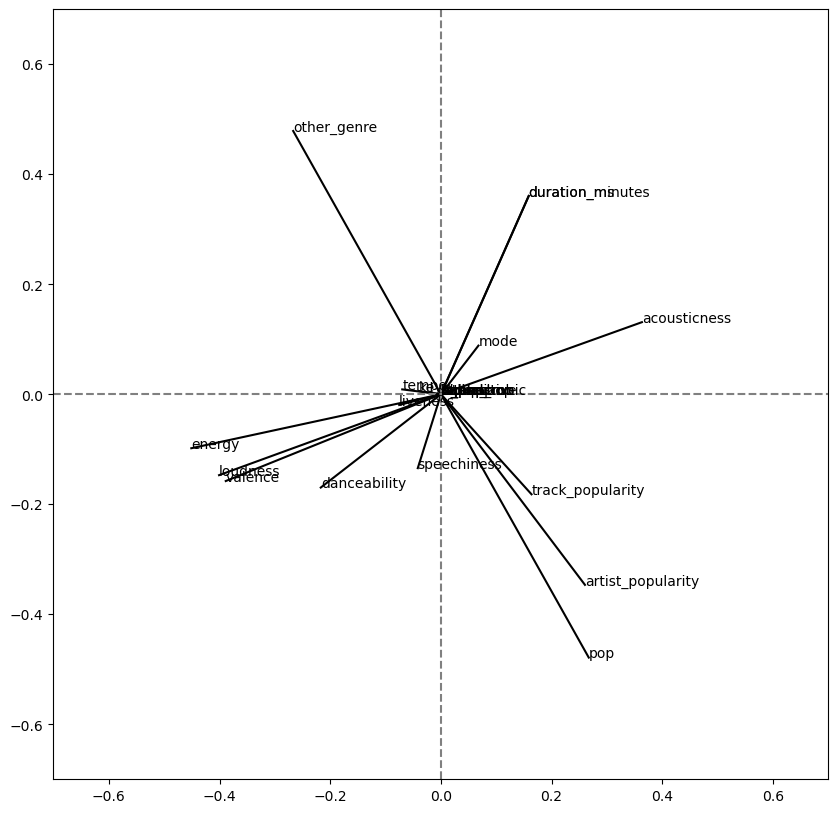

In [363]:
# récupérer les composants
new_components = pca_new.components_

# dessiner le schéma de cercle des corrélations
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(zip(new_components[0,:], new_components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_dropped.columns[i])
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);
plt.show()

# Clustering

In [364]:
# Clustering
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import scale

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist



d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412:

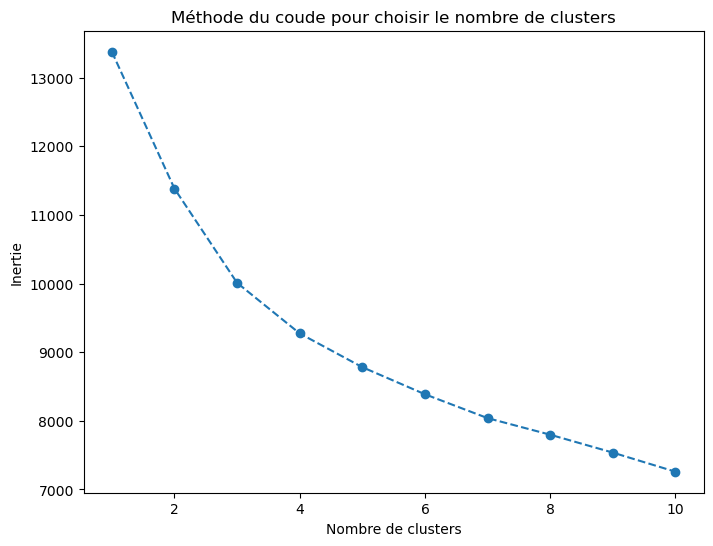

In [365]:
inertia = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir le nombre de clusters')
plt.show()

In [366]:
my_df = data[numeric_columns]
my_df

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,91,86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,84,75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,69,61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,88,83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,74,65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,79,86,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,69,85,0.937,0.793,11.0,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,86,82,0.911,0.573,6.0,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,77,84,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [367]:
my_df.isnull().sum()

track_popularity     0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [368]:
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler()
scaled_df = scaler.fit_transform(my_df)

agg_clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  # Vous pouvez ajuster le nombre de clusters selon vos besoins

agg_clustering.fit(scaled_df)

my_df['Cluster'] = agg_clustering.labels_


d:\Anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\Antony\AppData\Local\Temp\ipykernel_19708\3184917871.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [369]:
Z = linkage(scaled_df, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[1.54900000e+03 1.64800000e+03 0.00000000e+00 2.00000000e+00]
 [1.10500000e+03 1.20400000e+03 0.00000000e+00 2.00000000e+00]
 [8.09000000e+02 9.06000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [4.58100000e+03 4.59300000e+03 5.74613419e+01 1.31800000e+03]
 [4.56100000e+03 4.59400000e+03 6.36944545e+01 1.35100000e+03]
 [4.59100000e+03 4.59500000e+03 6.48604887e+01 2.29900000e+03]]


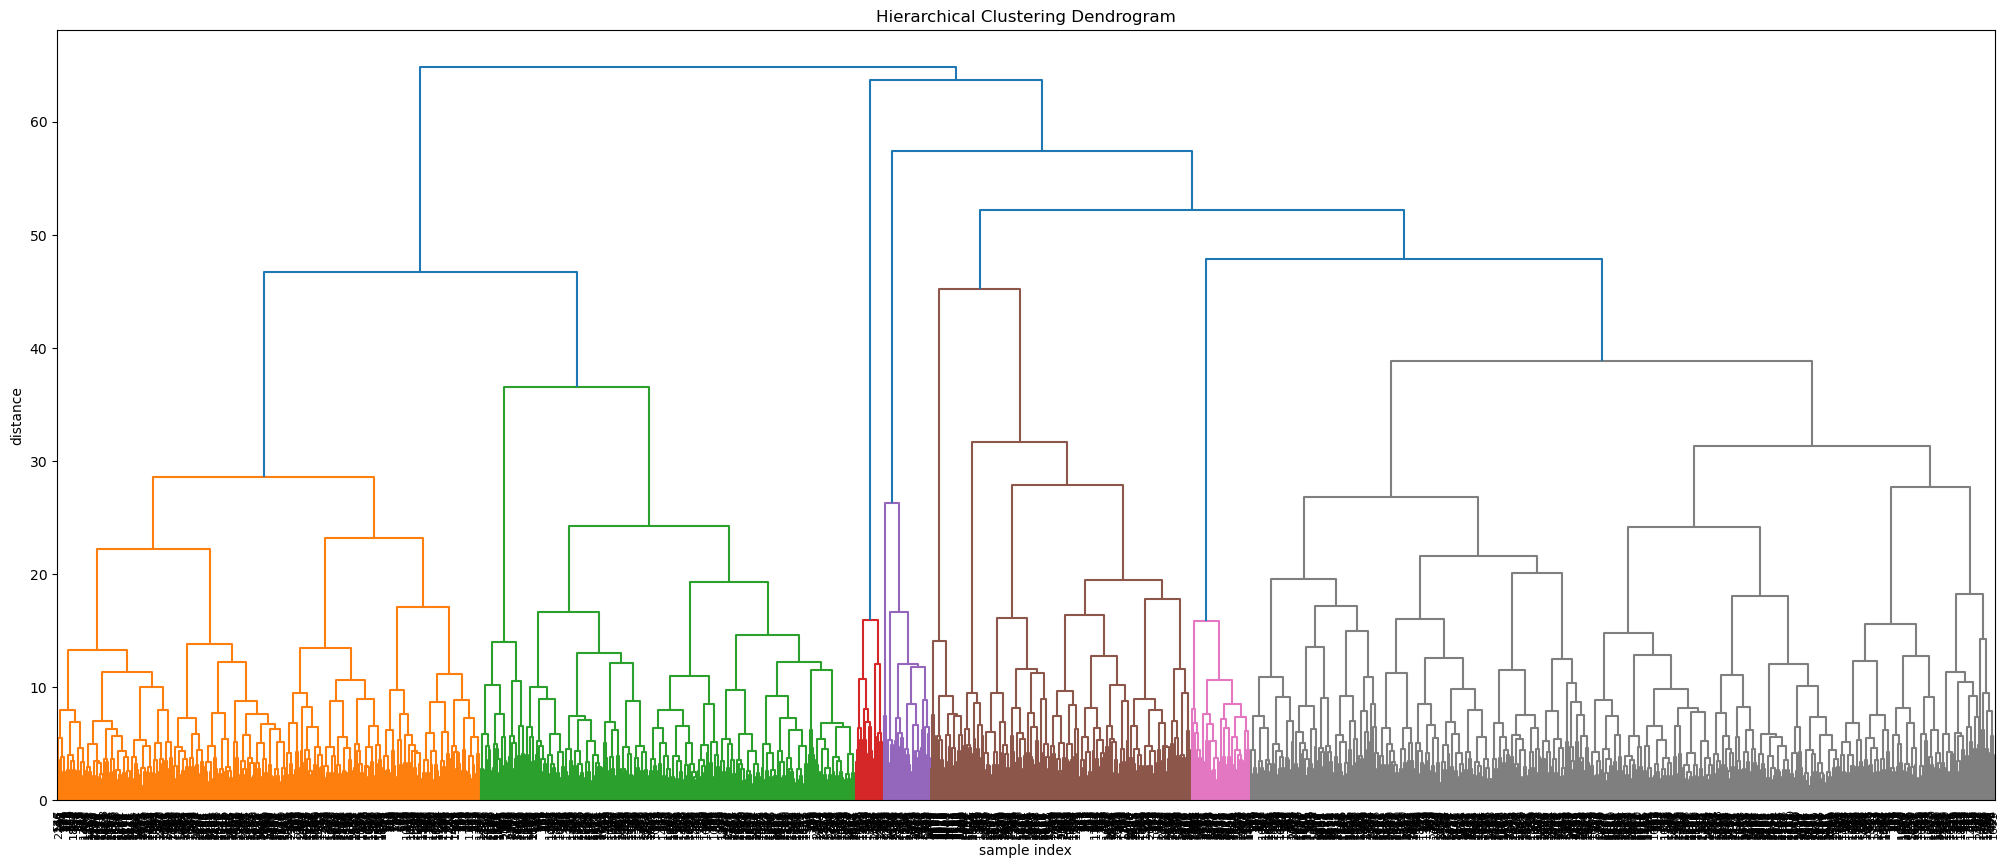

In [370]:
# We represent the Dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(scaled_df, 'ward'), leaf_rotation=90., leaf_font_size=8.
)
plt.show()

In [371]:
# DBSCAN method of clustering
from sklearn.cluster import DBSCAN

X_train = scaled_df

clustering = DBSCAN(eps=4, min_samples=4).fit(X_train)
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 32
